In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CS3
%pwd

Mounted at /content/drive
/content/drive/MyDrive/CS3


'/content/drive/MyDrive/CS3'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

In [ ]:
from plotly import express as px, graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 153 kB/s 


In [ ]:
plt.rcParams['figure.dpi'] = 300

In [ ]:
df_uniq = pd.read_csv("Zuco_uniq_o.csv")

In [ ]:
def word_vector(word):
    number_list = ['nFix', 'FFD', 'GPT', 'TRT', 'fixProp']
    return np.array(df_uniq[df_uniq['word'] == word][number_list])[0]

## Data preprocessing

In [ ]:
df_train_original = pd.read_csv("../data/training_data/train_and_valid.csv")
df_test_original = pd.read_csv("../data/test_data/truth.txt")

In [ ]:
df = pd.concat([df_train_original, df_test_original])

In [ ]:
df['word'] = df['word'].str.replace('.<EOS>','')

/var/folders/1c/95b9dlpd2xv9yjh6v0xw08700000gn/T/ipykernel_13276/786796607.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['word'] = df['word'].str.replace('.<EOS>','')


In [ ]:
df['word'] = df['word'].str.lower()

In [ ]:
df = df[df.word.str.isalpha()]

In [ ]:
df.head(15)

,sentence_id,word_id,word,nFix,FFD,GPT,TRT,fixProp
0,0,0,carlucci,28.397566,4.642973,6.190631,10.343594,94.117647
1,0,1,was,12.981744,3.534385,5.263977,4.565348,76.470588
2,0,2,deputy,25.152130,5.809781,9.926357,9.145251,100.000000
3,0,3,defense,20.283976,5.261551,8.092455,8.359293,88.235294
4,0,4,secretary,17.849899,4.135982,4.507129,5.686066,88.235294
5,0,5,from,12.981744,4.429503,5.169371,5.295512,82.352941
7,0,7,until,11.359026,3.216605,3.968602,3.786667,64.705882
9,0,9,national,19.472617,3.694487,8.643111,6.894112,82.352941
10,0,10,security,20.283976,4.252420,6.098451,7.313775,94.117647
11,0,11,advisor,13.793103,3.672655,4.296085,4.689064,76.470588


In [ ]:
df[df['word'] == 'she'].mean()

/var/folders/1c/95b9dlpd2xv9yjh6v0xw08700000gn/T/ipykernel_13276/2235991759.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['word'] == 'she'].mean()


sentence_id    568.959184
word_id          5.265306
nFix             9.307460
FFD              2.098361
GPT              3.301810
TRT              3.319451
fixProp         46.570795
dtype: float64

In [ ]:
df[df['word'] == 'he'].mean()

/var/folders/1c/95b9dlpd2xv9yjh6v0xw08700000gn/T/ipykernel_13276/1804113090.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['word'] == 'he'].mean()


sentence_id    482.460674
word_id          4.734082
nFix             4.752511
FFD              1.315503
GPT              1.797553
TRT              1.654981
fixProp         27.920412
dtype: float64

In [ ]:
df.to_csv('../data/Zuco.csv', index=False)

## word frequency

In [ ]:
df_dict = dict(df['word'].value_counts())

In [ ]:
len(df_dict)

4400

In [ ]:
df_dict

{'the': 1060,
 'of': 618,
 'and': 615,
 'a': 548,
 'in': 524,
 'to': 393,
 'was': 281,
 'he': 267,
 'his': 212,
 'is': 191,
 'as': 188,
 'for': 131,
 'with': 121,
 'that': 113,
 'on': 111,
 'an': 107,
 'from': 107,
 'it': 94,
 'at': 93,
 'by': 83,
 'but': 72,
 'this': 70,
 'who': 64,
 'one': 56,
 'film': 56,
 'movie': 54,
 'be': 52,
 'bush': 50,
 'she': 49,
 'its': 45,
 'has': 45,
 'after': 44,
 'her': 44,
 'american': 43,
 'president': 42,
 'new': 41,
 'also': 40,
 'not': 40,
 'have': 38,
 'had': 37,
 'were': 37,
 'most': 36,
 'born': 36,
 'which': 35,
 'first': 35,
 'all': 32,
 'like': 32,
 'george': 32,
 'about': 31,
 'more': 30,
 'during': 30,
 'or': 29,
 'john': 28,
 'when': 28,
 'became': 27,
 'united': 26,
 'been': 26,
 'family': 26,
 'time': 26,
 'only': 25,
 'while': 25,
 'than': 24,
 'later': 24,
 'married': 24,
 'both': 24,
 'states': 24,
 'their': 24,
 'you': 24,
 'son': 23,
 'war': 23,
 'into': 22,
 'will': 22,
 'work': 22,
 'world': 22,
 'if': 22,
 'two': 22,
 'school': 2

In [ ]:
da_freq = pd.DataFrame(df_dict.items(), columns=['Word', 'Frequency'])


In [ ]:
da_freq

,Word,Frequency
0,the,1060
1,of,618
2,and,615
3,a,548
4,in,524
...,...,...
4395,swedish,1
4396,curves,1
4397,described,1
4398,louisa,1


<AxesSubplot:xlabel='Frequency', ylabel='Word'>

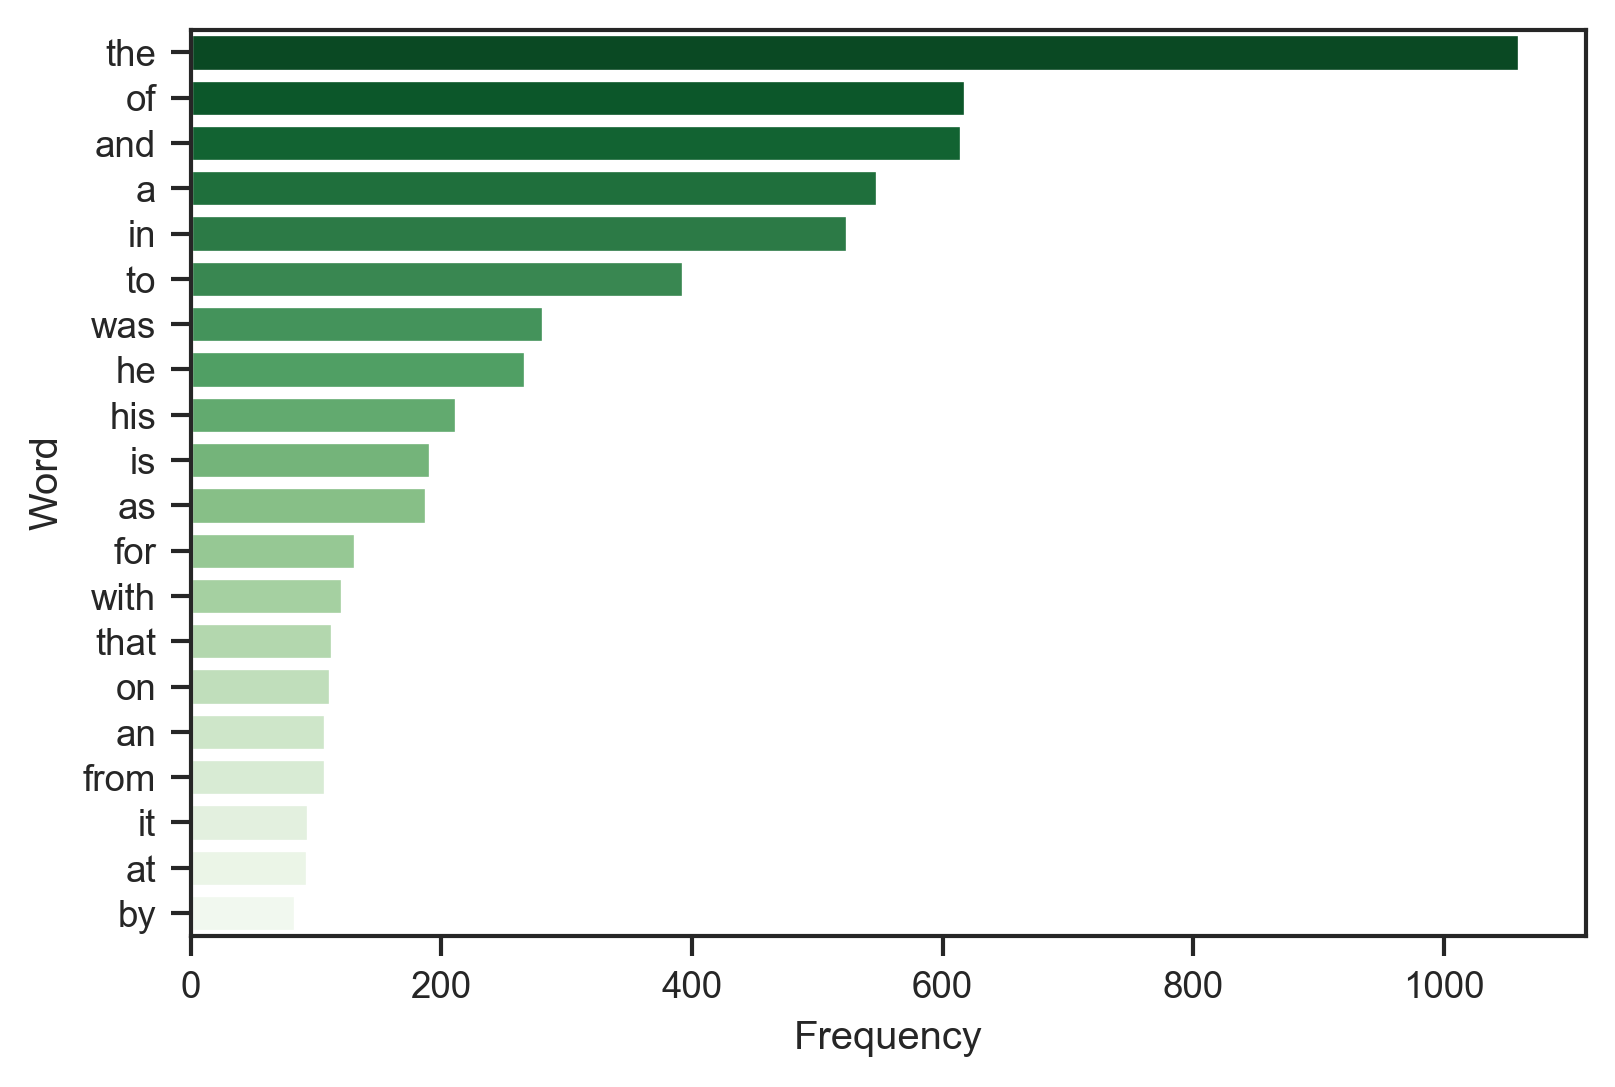

In [ ]:
sns.set_context("paper")
sns.set_style("ticks")
sns.barplot(x = 'Frequency', y='Word', data = da_freq.head(20), palette=("Greens_r"))


## the most similar words

In [ ]:
df_new = df.copy()
df_new = df_new.set_index('word').iloc[:,2:]

def similar_words(data, k = 10):
    distance_matrix = euclidean_distances(data)
    # Note the range of 1:k+1 
    # You need to discard the first column 
    # as that would have the index of the same input word 
    # because distance between the same word is the minimum (i.e. 0) 
    top_k_ids = np.argsort(distance_matrix, axis=-1)[:, 1:k+1]

    # The input words
    inputs = data.index.values

    # We go through each column of top_k_ids and index inputs 
    # and stack those results on columns axis
    outputs = np.stack([inputs[top_k_ids[:, i]] for i in range(k)], axis=-1)
    return outputs

In [ ]:
outputs = similar_words(df_new)

In [ ]:
for i in range(50):
    print(f'{df.word.values[i]}: {outputs[i]}')

carlucci: ['submissive' 'rosemary' 'founded' 'attended' 'pierce' 'groucho' 'armando'
 'prominent' 'against' 'married']
was: ['elder' 'when' 'out' 'next' 'would' 'was' 'from' 'without' 'and' 'were']
deputy: ['abraham' 'maria' 'piece' 'working' 'accepted' 'governor' 'passer'
 'engineers' 'intelligence' 'forgiveness']
defense: ['snarky' 'adopted' 'homeland' 'refused' 'brought' 'actor' 'trophy'
 'tycoon' 'tulane' 'ulysses']
secretary: ['publisher' 'impressed' 'child' 'rose' 'kennedy' 'director' 'university'
 'public' 'spring' 'welfare']
from: ['brother' 'libby' 'across' 'also' 'one' 'third' 'the' 'political' 'movie'
 'show']
until: ['second' 'were' 'area' 'an' 'came' 'first' 'the' 'joined' 'his' 'first']
national: ['clear' 'few' 'singer' 'winning' 'name' 'while' 'young' 'audiences'
 'disco' 'talent']
security: ['throwing' 'contact' 'tennessee' 'presidential' 'appeared' 'teammate'
 'practicing' 'season' 'stayed' 'alabama']
advisor: ['were' 'first' 'his' 'married' 'some' 'army' 'ten' 'had' '

## Average features

In [ ]:
my_df =[]
number_list = ['nFix', 'FFD', 'GPT', 'TRT', 'fixProp']

In [ ]:
for i in df_dict.keys():
    my_df.append(list(df[df['word'] == i][number_list].mean()))

In [ ]:
len(my_df)

4400

In [ ]:
df[df['word'] == 'he'][number_list].mean()

nFix        4.752511
FFD         1.315503
GPT         1.797553
TRT         1.654981
fixProp    27.920412
dtype: float64

In [ ]:
df_uniq = pd.DataFrame(my_df, columns = number_list)

In [ ]:
df_uniq.insert(0, "word", list(df_dict.keys()), True)

In [ ]:
df_uniq

,word,nFix,FFD,GPT,TRT,fixProp
0,the,8.089145,2.037560,3.279184,2.620190,46.250203
1,of,5.558040,1.492221,2.538022,1.791782,33.937491
2,and,7.638862,1.941896,3.306894,2.450817,44.722639
3,a,5.309940,1.491783,2.447444,1.775713,32.829983
4,in,5.313665,1.489553,2.466216,1.798441,32.379519
...,...,...,...,...,...,...
4395,swedish,24.137931,4.171965,6.316368,7.849067,83.333333
4396,curves,14.942529,3.625554,4.642771,5.161689,66.666667
4397,described,18.390805,3.773326,19.523008,6.354170,91.666667
4398,louisa,31.034483,4.800852,5.474415,11.835458,100.000000


In [ ]:
df_new  = df_uniq.copy()
df_new = df_new.set_index('word')

In [ ]:
outputs = similar_words(df_new)

In [ ]:
for i in range(50):
    print(f'{df_uniq.word.values[i]}: {outputs[i]}')

the: ['for' 'his' 'why' 'let' 'search' 'an' 'but' 'she' 'speak' 'and']
of: ['a' 'spine' 'ship' 'lofty' 'o' 'in' 'ask' 'to' 'sea' 'sit']
and: ['an' 'us' 'ike' 'search' 'as' 'any' 'let' 'the' 'et' 'why']
a: ['in' 'spine' 'ship' 'of' 'lofty' 'o' 'ask' 'sea' 'sit' 'busy']
in: ['a' 'spine' 'ship' 'lofty' 'o' 'of' 'ask' 'sea' 'sit' 'busy']
to: ['do' 'of' 'at' 'sad' 'tv' 'spine' 'by' 'ship' 'lofty' 'o']
was: ['from' 'since' 'left' 'novel' 'got' 'one' 'while' 'central' 'did' 'man']
he: ['we' 'lilo' 'it' 'al' 'line' 'alive' 'our' 'brain' 'in' 'ken']
his: ['for' 'but' 'the' 'she' 'speak' 'why' 'let' 'study' 'park' 'search']
is: ['girl' 'on' 'gift' 'or' 'by' 'nor' 'wade' 'yarn' 'cox' 'gaze']
as: ['up' 'ike' 'us' 'and' 'et' 'any' 'all' 'an' 'search' 'wade']
for: ['the' 'his' 'let' 'but' 'she' 'an' 'why' 'speak' 'search' 'and']
with: ['get' 'iii' 'my' 'how' 'not' 'this' 'into' 'who' 'until' 'said']
that: ['go' 'five' 'just' 'vote' 'face' 'after' 'yet' 'out' 'want' 'fit']
on: ['or' 'gift' 'nor' 'wad

In [ ]:
# df_uniq.to_csv('../data/Zuco_uniq.csv', index=False)
df_uniq = pd.read_csv("/content/Zuco_uniq.csv")

In [ ]:
distance_vector = []
for i in df_uniq.word.values:
    distance_vector.append(math.dist(word_vector(i), (word_vector('father') - word_vector('mother')+ word_vector('son'))))
    
distance_vector = np.array(distance_vector)
top_k_ids = np.argsort(distance_vector, 0)[:10]
df_uniq.word.values[top_k_ids]

array(['king', 'fight', 'inning', 'says', 'hans', 'core', 'soldiers',
       'little', 'twice', 'ford'], dtype=object)

In [ ]:
def calculate_sim(vector, k):
    distance_vector = []
    for i in df_uniq.word.values:
        distance_vector.append(math.dist(word_vector(i), vector))
        
    distance_vector = np.array(distance_vector)
    top_k_ids = np.argsort(distance_vector, 0)[:k]
    return df_uniq.word.values[top_k_ids]

In [ ]:
calculate_sim(word_vector('she') - word_vector('he') + word_vector('man'), 28)[27]

'woman'

In [ ]:
# calculate_sim(word_vector('father') - word_vector('mother') + word_vector('son'), 2113)

## TSNE

In [ ]:
df_uniq_100 = df_uniq.head(100)

In [ ]:
import nltk
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
wordtags = nltk.ConditionalFreqDist((w.lower(), t) for w, t in nltk.corpus.brown.tagged_words(tagset="universal"))

In [ ]:
list(wordtags["kind"])

['NOUN', 'ADJ']

In [ ]:
tags = []
for i in df_uniq_100.word.values:
  tags.append(list(wordtags[i])[0])
  # print(f'{i}: {}')

### Plot 1

In [ ]:
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in df_uniq_100.word.values:
        tokens.append(word_vector(word))
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    data = pd.DataFrame(new_values, columns = ['X','Y'])
    data['labels'] = labels
    data['POS'] = tags
    plt.figure(figsize=(16, 16)) 
    fig = px.scatter(data,
                     x='X',
                     y='Y',
                     # size='dot_size',
                     text='labels',
                     color = 'POS',
                    # color_discrete_sequence=['green']
                     # log_x=True,
                    #  labels={
                    #      "x": " ",
                    #      "y": " ",
                    #      # 'dot_size': 'Portability',
                    #     #  'explainer_name': 'Explainer '
                    #  },
                    #  title='No overlapping annotations',  # take some vertical space
                     )  
    def improve_text_position(x):
        """ it is more efficient if the x values are sorted """
        positions = ['top center', 'bottom center']  # you can add more: left center ...
        return [positions[i % len(positions)] for i in range(len(x))]

    fig.update_traces(marker=dict(size=12, symbol="circle", line=dict(width=2, color="DarkSlateGrey")), 
                      textposition = improve_text_position(data['X']))


    # fig.update_xaxes(tickfont=dict(size=30))
    fig.update_layout(
    xaxis_title=None,
    yaxis_title=None,
    autosize= False,
    width=1800,
    height=1800,

    legend = dict(font=dict(size= 30)),
    font=dict(size=18))
        # color="RebeccaPurple")
    fig.show()


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<Figure size 1152x1152 with 0 Axes>

In [ ]:
fig.write_image("fig-100.pdf")

#### Plot 2

In [ ]:
labels = []
tokens = []

In [ ]:
for word in df_uniq.word.values:
  tokens.append(word_vector(word))
  labels.append(word)

In [ ]:
len(labels)

4400

In [ ]:
tokens_norm = normalize(tokens)

In [ ]:
# tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
# new_values = tsne_model.fit_transform(tokens)
pca = PCA(n_components=2)
new_values = pca.fit_transform(tokens_norm)
data = pd.DataFrame(new_values, columns = ['X','Y'])
data['labels'] = labels
# data['POS'] = tags

In [ ]:
# 

In [ ]:
# labels_1 =['he$_{(267)}$', 'man$_{(11)}$', 'son$_{(23)}$', 'brother$_{(18)}$',  'nephew$_{(2)}$', 'male$_{(3)}$']
# labels_2 =['she$_{(49)}$', 'woman$_{(2)}$', 'daughter$_{(8)}$', 'sister$_{(3)}$', 'niece$_{(1)}$', 'female$_{(1)}$']

In [ ]:
# p1_x = [data[data['labels'] == 'he'].values[0][:2][0],
#     data[data['labels'] == 'man'].values[0][:2][0],
#       data[data['labels'] == 'son'].values[0][:2][0],
#       data[data['labels'] == 'brother'].values[0][:2][0],
#       data[data['labels'] == 'nephew'].values[0][:2][0],
#       data[data['labels'] == 'male'].values[0][:2][0]]

# p1_y = [data[data['labels'] == 'he'].values[0][:2][1],
#     data[data['labels'] == 'man'].values[0][:2][1],
#       data[data['labels'] == 'son'].values[0][:2][1],
#       data[data['labels'] == 'brother'].values[0][:2][1],
#       data[data['labels'] == 'nephew'].values[0][:2][1],
#       data[data['labels'] == 'male'].values[0][:2][1]]

# p2_x = [data[data['labels'] == 'she'].values[0][:2][0],
#     data[data['labels'] == 'woman'].values[0][:2][0],
#       data[data['labels'] == 'daughter'].values[0][:2][0],
#       data[data['labels'] == 'sister'].values[0][:2][0],
#       data[data['labels'] == 'niece'].values[0][:2][0],
#       data[data['labels'] == 'female'].values[0][:2][0]]
      
# p2_y = [data[data['labels'] == 'she'].values[0][:2][1],
#     data[data['labels'] == 'woman'].values[0][:2][1],
#       data[data['labels'] == 'daughter'].values[0][:2][1],
#       data[data['labels'] == 'sister'].values[0][:2][1],
#       data[data['labels'] == 'niece'].values[0][:2][1],
#       data[data['labels'] == 'female'].values[0][:2][1]]
      

In [ ]:
# ## unormalization

# fig, ax = plt.subplots()
# ax.set_facecolor('white')

# for i in range(len(p1_x)):  
#   if i == 0:   
#     ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'darkgreen', marker='o', markersize = 3, linestyle = 'dashed', linewidth=1.5, label = 'Pattern 1')
#     ax.annotate(labels_1[i], xy = (p1_x[i],p1_y[i]), xytext = (p1_x[i] + 1 ,p1_y[i]))
#     ax.annotate(labels_2[i], xy = (p2_x[i],p2_y[i]), xytext = (p2_x[i] + 2 ,p2_y[i]))

#   elif i in [1,2]:
#     ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'darkgreen', marker='o', markersize = 3, linestyle = 'dashed', linewidth=1.5)
#     ax.annotate(labels_1[i], xy = (p1_x[i],p1_y[i]), xytext = (p1_x[i] + 1 ,p1_y[i]))
#     ax.annotate(labels_2[i], xy = (p2_x[i],p2_y[i]), xytext = (p2_x[i] + 1 ,p2_y[i] - 0.3))

#   elif i == 3:
#     ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'crimson', marker='o', markersize = 3, linestyle = 'dashed', linewidth=1.5, label = 'Pattern 2')
#     ax.annotate(labels_1[i], xy = (p1_x[i],p1_y[i]), xytext = (p1_x[i] - 4 ,p1_y[i] + 2.5))
#     ax.annotate(labels_2[i], xy = (p2_x[i],p2_y[i]), xytext = (p2_x[i]  ,p2_y[i] - 3))
#   else:
#     ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'crimson', marker='o', markersize = 3, linestyle = 'dashed', linewidth=1.5)
#     ax.annotate(labels_1[i], xy = (p1_x[i],p1_y[i]), xytext = (p1_x[i] - 8 ,p1_y[i] + 0.5  ))
#     ax.annotate(labels_2[i], xy = (p2_x[i],p2_y[i]), xytext = (p2_x[i] - 8 ,p2_y[i] - 1))

# ax.legend(loc = 'lower right', prop={'size': 12})
  

In [ ]:
p1_x = [data[data['labels'] == 'man'].values[0][:2][0],
    data[data['labels'] == 'he'].values[0][:2][0],
      data[data['labels'] == 'son'].values[0][:2][0],
      data[data['labels'] == 'brother'].values[0][:2][0],
      data[data['labels'] == 'nephew'].values[0][:2][0],
      data[data['labels'] == 'male'].values[0][:2][0]]

p1_y = [data[data['labels'] == 'man'].values[0][:2][1],
    data[data['labels'] == 'he'].values[0][:2][1],
      data[data['labels'] == 'son'].values[0][:2][1],
      data[data['labels'] == 'brother'].values[0][:2][1],
      data[data['labels'] == 'nephew'].values[0][:2][1],
      data[data['labels'] == 'male'].values[0][:2][1]]

p2_x = [data[data['labels'] == 'woman'].values[0][:2][0],
    data[data['labels'] == 'she'].values[0][:2][0],
      data[data['labels'] == 'daughter'].values[0][:2][0],
      data[data['labels'] == 'sister'].values[0][:2][0],
      data[data['labels'] == 'niece'].values[0][:2][0],
      data[data['labels'] == 'female'].values[0][:2][0]]
      
p2_y = [data[data['labels'] == 'woman'].values[0][:2][1],
    data[data['labels'] == 'she'].values[0][:2][1],
      data[data['labels'] == 'daughter'].values[0][:2][1],
      data[data['labels'] == 'sister'].values[0][:2][1],
      data[data['labels'] == 'niece'].values[0][:2][1],
      data[data['labels'] == 'female'].values[0][:2][1]]
      

In [ ]:
labels_1 =['man$_{(11)}$','he$_{(267)}$' , 'son$_{(23)}$', 'brother$_{(18)}$',  'nephew$_{(2)}$', 'male$_{(3)}$']
labels_2 =['woman$_{(2)}$', 'she$_{(49)}$', 'daughter$_{(8)}$', 'sister$_{(3)}$', 'niece$_{(1)}$', 'female$_{(1)}$']

In [ ]:
plt.style.use('bmh')
plt.rcParams["font.family"] = "Times New Roman"
figure(figsize=(8, 4))

<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

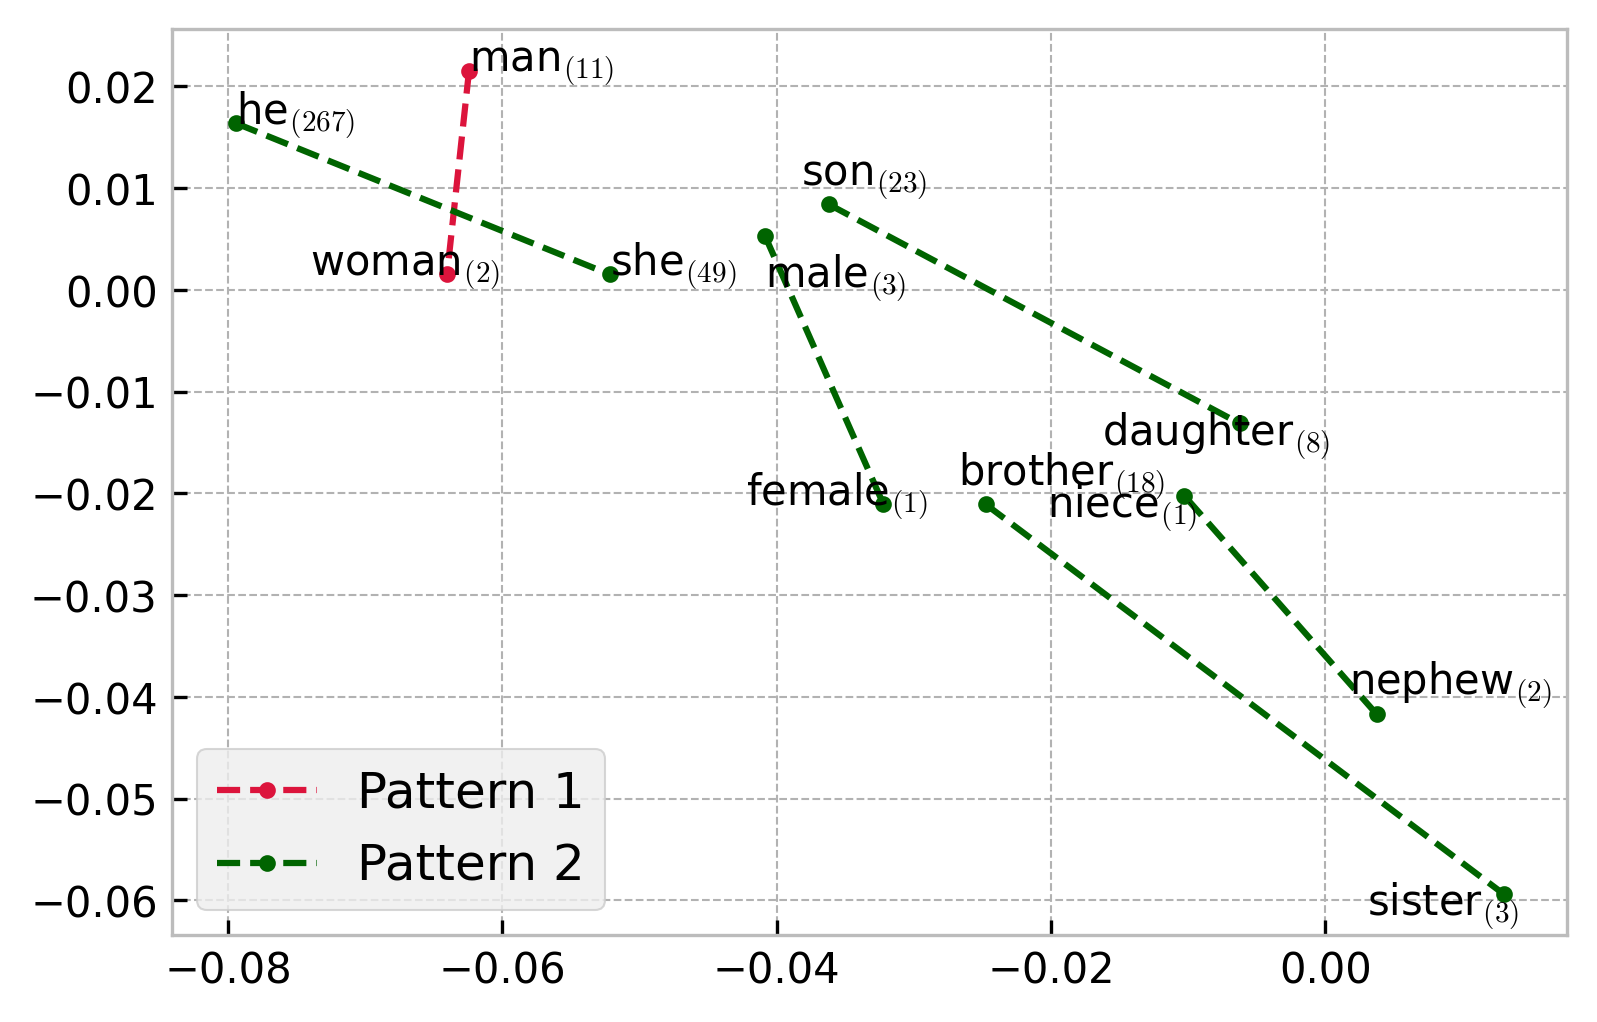

In [ ]:
# normalization
fig, ax = plt.subplots()
ax.set_facecolor('white')

for i in range(len(p1_x)):  
  if i == 0:   
    ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'crimson', marker='o', markersize = 3, linestyle = 'dashed', linewidth=1.5, label = 'Pattern 1')
    ax.annotate(labels_1[i], xy = (p1_x[i],p1_y[i]), xytext = (p1_x[i]  ,p1_y[i]))
    ax.annotate(labels_2[i], xy = (p2_x[i],p2_y[i]), xytext = (p2_x[i] - 0.01  ,p2_y[i]))

  # elif i in [1,2]:
  #   ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'darkgreen', marker='o', markersize = 3, linestyle = 'dashed', linewidth=1.5)
  #   ax.annotate(labels_1[i], xy = (p1_x[i],p1_y[i]), xytext = (p1_x[i]  ,p1_y[i]))
  #   ax.annotate(labels_2[i], xy = (p2_x[i],p2_y[i]), xytext = (p2_x[i]  ,p2_y[i]))

  elif i == 1:
    ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'darkgreen', marker='o', markersize = 3, linestyle = 'dashed', linewidth=1.5, label = 'Pattern 2')
    ax.annotate(labels_1[i], xy = (p1_x[i],p1_y[i]), xytext = (p1_x[i]  ,p1_y[i] ))
    ax.annotate(labels_2[i], xy = (p2_x[i],p2_y[i]), xytext = (p2_x[i]  ,p2_y[i] ))
  
  elif i == 5:
    ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'darkgreen', marker='o', markersize = 3, linestyle = 'dashed', linewidth=1.5)
    ax.annotate(labels_1[i], xy = (p1_x[i],p1_y[i]), xytext = (p1_x[i]  ,p1_y[i] - 0.005  ))
    ax.annotate(labels_2[i], xy = (p2_x[i],p2_y[i]), xytext = (p2_x[i]  - 0.01 ,p2_y[i] ))

  
  else:
    ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'darkgreen', marker='o', markersize = 3, linestyle = 'dashed', linewidth=1.5)
    ax.annotate(labels_1[i], xy = (p1_x[i],p1_y[i]), xytext = (p1_x[i] - 0.002  ,p1_y[i] + 0.002  ))
    ax.annotate(labels_2[i], xy = (p2_x[i],p2_y[i]), xytext = (p2_x[i] -0.01 ,p2_y[i] - 0.002 ))


ax.legend(loc = 'lower left', prop={'size': 12})
# ax.set_yticks(np.arange(-0.1, 0.26, 0.05))
  

Glove

In [ ]:
def load_embedding(filename):
    '''
    Load Word Embedding: return dict, voc size, and dim of embedding
    '''
    embedding_dict = {}
    with open(filename,'r', encoding='utf8') as f:
        for line in f:
            if '\x85' in line:
                split_line = ['\x85'] + line.split()
            else:
                split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            embedding_dict[word] = embedding
    return embedding_dict, len(embedding_dict), len(embedding)

In [ ]:
glove_path = 'glove.twitter.27B.50d.txt'
glove_dict, glove_counts, glove_dim = load_embedding(glove_path)

In [ ]:
labels = []
tokens_glove = []

In [ ]:
glove_list = list(glove_dict.keys())

In [ ]:
for word in df_uniq.word.values:
  if word in glove_list:
      tokens_glove.append(glove_dict[word])
      labels.append(word)

In [ ]:
tokens_glove = np.array(tokens_glove)

In [ ]:
tokens_glove = normalize(tokens_glove)

In [ ]:
pca = PCA(n_components=2)
new_values = pca.fit_transform(tokens_glove)
data = pd.DataFrame(new_values, columns = ['X','Y'])
data['labels'] = labels
# data['POS'] = tags

In [ ]:
labels_1 =['he',  'male', 'son', 'nephew', 'man', 'brother']
labels_2 =['she', 'female', 'daughter', 'niece', 'woman', 'sister']

In [ ]:
p1_x = [data[data['labels'] == 'he'].values[0][:2][0],
      data[data['labels'] == 'male'].values[0][:2][0],
      data[data['labels'] == 'son'].values[0][:2][0],
      data[data['labels'] == 'nephew'].values[0][:2][0],
      data[data['labels'] == 'man'].values[0][:2][0],
      data[data['labels'] == 'brother'].values[0][:2][0]]

p1_y = [data[data['labels'] == 'he'].values[0][:2][1],
      data[data['labels'] == 'male'].values[0][:2][1],
      data[data['labels'] == 'son'].values[0][:2][1],
      data[data['labels'] == 'nephew'].values[0][:2][1],
      data[data['labels'] == 'man'].values[0][:2][1],
      data[data['labels'] == 'brother'].values[0][:2][1]]

p2_x = [data[data['labels'] == 'she'].values[0][:2][0],
      data[data['labels'] == 'female'].values[0][:2][0],
      data[data['labels'] == 'daughter'].values[0][:2][0],
      data[data['labels'] == 'niece'].values[0][:2][0],
      data[data['labels'] == 'woman'].values[0][:2][0],
      data[data['labels'] == 'sister'].values[0][:2][0]]
      
p2_y = [data[data['labels'] == 'she'].values[0][:2][1],
      data[data['labels'] == 'female'].values[0][:2][1],
      data[data['labels'] == 'daughter'].values[0][:2][1],
      data[data['labels'] == 'niece'].values[0][:2][1],
      data[data['labels'] == 'woman'].values[0][:2][1],
      data[data['labels'] == 'sister'].values[0][:2][1]]
      

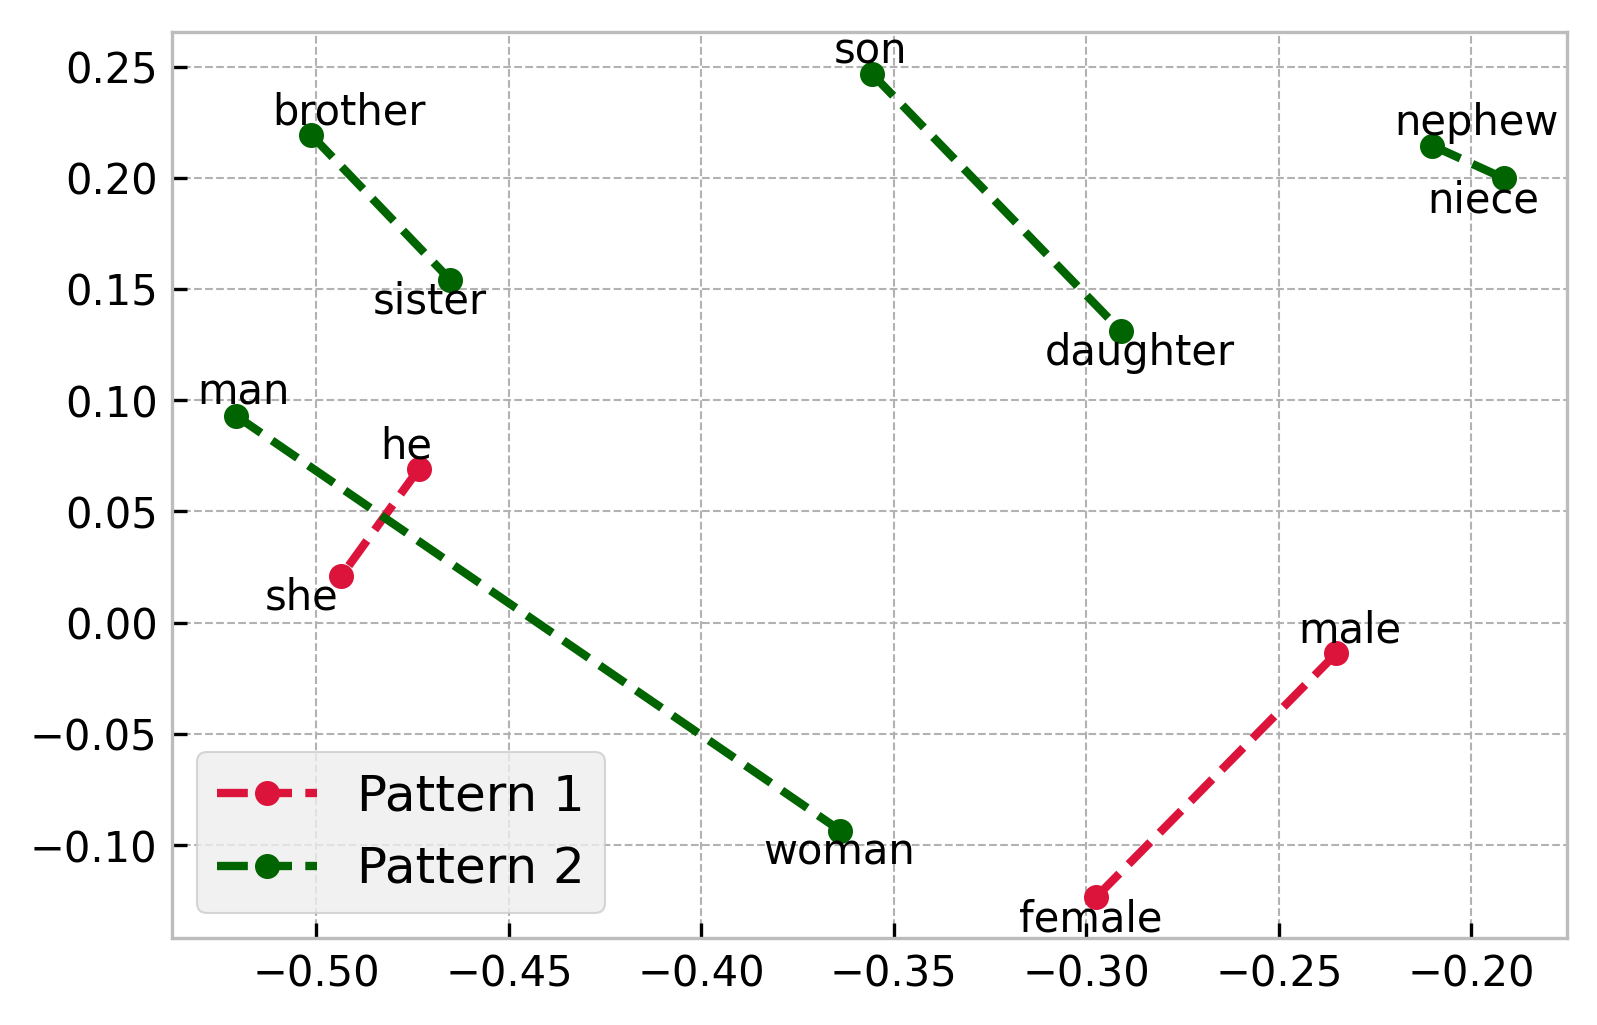

<Figure size 2400x1200 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
figure(figsize=(8, 4), dpi=300)
ax.set_facecolor('white')

for i in range(len(p1_x)):  
  ax.annotate(labels_1[i], xy = (p1_x[i],p1_y[i]), xytext = (p1_x[i] - 0.01 ,p1_y[i] + 0.005))
  ax.annotate(labels_2[i], xy = (p2_x[i],p2_y[i]), xytext = (p2_x[i] - 0.02 ,p2_y[i] - 0.015))
  
  if i == 0:   
    ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'crimson', marker='o', markersize = 5, linestyle = 'dashed', label = 'Pattern 1')
  
  elif i in [1]:
    ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'crimson', marker='o', markersize = 5, linestyle = 'dashed')
  
  elif i == 2:
    ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'darkgreen', marker='o', markersize = 5, linestyle = 'dashed', label = 'Pattern 2')
  else:
    ax.plot([p1_x[i],p2_x[i]], [p1_y[i], p2_y[i]], color = 'darkgreen', marker='o', markersize = 5, linestyle = 'dashed')

ax.legend(loc = 'lower left', prop={'size': 12})
# ax.set_yticks(np.arange(-1, 1, 0.2))
# ax.set_xticks(np.arange(-1,1, 0.2))
  